In [68]:
import sys

In [21]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
src_conn = sqlite3.connect('/Volumes/Samsung_T5/databases/Hela_20A_20R_500-features.sqlite')
src_c = src_conn.cursor()

src_conn_2 = sqlite3.connect('/Volumes/Samsung_T5/databases/Hela_20A_20R_500-features-1-100000-random-1000-sf-1000.sqlite')
src_c_2 = src_conn_2.cursor()

In [6]:
feature_df = pd.read_sql_query("select * from features where feature_id = 96784", src_conn)

In [7]:
feature_df

,feature_id,base_frame_id,base_cluster_id,charge_state,start_frame,end_frame,quality_score,summed_intensity,scan_lower,scan_upper,mz_lower,mz_upper
0,96784,1976,283,2,1970,1982,1.0,300095,138,154,537.202515,539.711365


In [69]:
peaks_df = pd.read_sql_query("select * from summed_ms1_regions where feature_id = 96784 order by peak_id", src_conn_2)

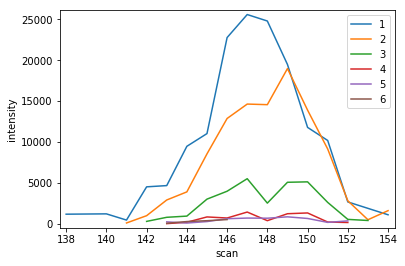

In [70]:
fig, ax = plt.subplots()
for key, grp in peaks_df.groupby(['peak_id']):
    ax = grp.plot(ax=ax, kind='line', x='scan', y='intensity', label=key)
plt.legend(loc='best')
plt.xlabel('scan')
plt.ylabel('intensity')
plt.margins(0.02)
plt.show()

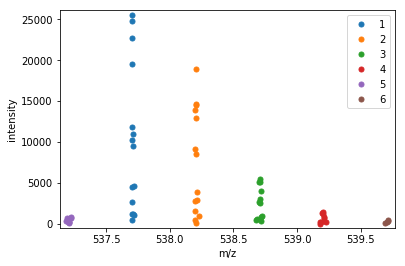

In [71]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
groups = peaks_df.groupby('peak_id')
for name, group in groups:
    ax.plot(group.mz, group.intensity, marker='o', linestyle='', ms=5, label=name)
plt.legend(loc='best')
plt.xlabel('m/z')
plt.ylabel('intensity')
plt.margins(0.02)
plt.show()

In [81]:
peaks_df.intensity/peaks_df.intensity.max()*20

0      0.925506
1      0.956773
2      0.362698
3      3.538654
4      3.656687
5      7.410303
6      8.626593
7     17.800360
8     20.000000
9     19.381693
10    15.229422
11     9.217541
12     7.967639
13     2.095677
14     0.869225
15     0.085985
16     0.782459
17     2.282498
18     3.056359
19     6.687251
20    10.069569
21    11.446103
22    11.389041
23    14.837802
24    10.866880
25     7.153131
26     2.201985
27     0.395529
28     1.263191
29     0.237630
        ...    
35     1.983116
36     3.973267
37     4.014696
38     2.050340
39     0.428359
40     0.323614
41     0.024232
42     0.155554
43     0.662863
44     0.559681
45     1.129524
46     0.305636
47     0.969280
48     1.043539
49     0.174314
50     0.131322
51     0.191511
52     0.078949
53     0.219651
54     0.491675
55     0.554209
56     0.540921
57     0.673024
58     0.515907
59     0.142265
60     0.285312
61     0.057062
62     0.221215
63     0.304073
64     0.410381
Name: intensity, Length:

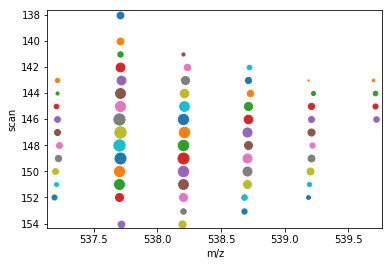

In [117]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
groups = peaks_df.groupby('peak_id')
min_intensity, max_intensity = peaks_df.intensity.min(), peaks_df.intensity.max()
for name, group in groups:
    for data_point in group.itertuples():
        markersize = 10+1.5*np.log(data_point.intensity*0.0001)
        ax.plot(data_point.mz, data_point.scan, marker='o', linestyle='', markersize=markersize, label=name)
# plt.legend(loc='best')
plt.xlabel('m/z')
plt.ylabel('scan')
plt.gca().invert_yaxis()
plt.margins(0.02)
plt.show()